# Module 2, first lab practice
## Dataset: Kaggle data of titanic 
## Analysis method: simple linear regression

##### NOTE: Italic sentences are for noting extra code for errors or pre-processing
##### This dataset is not appropriate for Simple Linear Regression because independent variable is binary. Still, I tried to apply Simple linear regression and practice plots and pre-processing of this data.  


## Data Dictionary

#### Variable	Definition	Key
survival:	Survival	0 = No, 1 = Yes
pclass:	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex:	Sex	
Age:	Age in years	
sibsp:	# of siblings / spouses aboard the Titanic	
parch:	# of parents / children aboard the Titanic	
ticket:	Ticket number	
fare:	Passenger fare	
cabin:	Cabin number	
embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

#### Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

importing packages and downloading data.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [4]:
import warnings 
warnings.filterwarnings('ignore')

In [57]:
titanic = pd.read_csv('C:/Users/admin/Desktop/data analysis/machine learning/titanic/train.csv')

Data exploration

In [58]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Selecting data to explore more

In [59]:
sdf = titanic[['Pclass','Age','Fare','Sex','Parch','SibSp','Cabin','Ticket','Embarked','Survived']]
sdf.head()

,Pclass,Age,Fare,Sex,Parch,SibSp,Cabin,Ticket,Embarked,Survived
0,3,22.0,7.2500,male,0,1,NaN,A/5 21171,S,0
1,1,38.0,71.2833,female,0,1,C85,PC 17599,C,1
2,3,26.0,7.9250,female,0,0,NaN,STON/O2. 3101282,S,1
3,1,35.0,53.1000,female,0,1,C123,113803,S,1
4,3,35.0,8.0500,male,0,0,NaN,373450,S,0


### Pre-processing

In [9]:
sdf.info()
sdf.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
 3   Sex       891 non-null    object 
 4   Parch     891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Cabin     204 non-null    object 
 7   Ticket    891 non-null    object 
 8   Embarked  889 non-null    object 
 9   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


Pclass        0
Age         177
Fare          0
Sex           0
Parch         0
SibSp         0
Cabin       687
Ticket        0
Embarked      2
Survived      0
dtype: int64

### Data Preprocessing- na value 
#### Cabin : extract from dataframe, or replace with "" (space)
#### Age: mean
#### Embarked: frequent


In [60]:
ar = sdf #copy of dataframe 

### Age <- replace null value with mean value, change data type as int  

In [11]:
print(sdf['Age'].mean())
mean_age=29

29.69911764705882


In [12]:
ar['Age'].fillna(mean_age,inplace=True)

In [13]:
print("# of missing value in Age: "+ str(ar['Age'].isnull().sum()))

# of missing value in Age: 0


In [12]:
ar['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    29.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [14]:
ar[["Age"]] = ar[["Age"]].astype("int")

In [15]:
ar.dtypes

Pclass        int64
Age           int32
Fare        float64
Sex          object
Parch         int64
SibSp         int64
Cabin        object
Ticket       object
Embarked     object
Survived      int64
dtype: object

### Embarked <- freqent data 

In [16]:
from collections import Counter

cnt = Counter(ar['Embarked']) 

print(cnt.most_common()[:2]) 

[('S', 644), ('C', 168)]


In [17]:
ar['Embarked'].replace(np.nan, 'S', inplace=True)

In [18]:
ar['Embarked'].isnull().sum()

0

In [22]:
ar.isnull().sum()

Pclass      0
Age         0
Fare        0
Sex         0
Parch       0
SibSp       0
Cabin       0
Ticket      0
Embarked    0
Survived    0
dtype: int64

### Cabin < - replace with ""

In [19]:
ar['Cabin'].replace(np.nan, "", inplace = True)

In [20]:
ar['Cabin']
ar.isnull().sum()

Pclass      0
Age         0
Fare        0
Sex         0
Parch       0
SibSp       0
Cabin       0
Ticket      0
Embarked    0
Survived    0
dtype: int64

#### Outliers

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

ar_out = ar
ar_out.head()

,Pclass,Age,Fare,Sex,Parch,SibSp,Cabin,Ticket,Embarked,Survived
0,3,22,7.2500,male,0,1,,A/5 21171,S,0
1,1,38,71.2833,female,0,1,C85,PC 17599,C,1
2,3,26,7.9250,female,0,0,,STON/O2. 3101282,S,1
3,1,35,53.1000,female,0,1,C123,113803,S,1
4,3,35,8.0500,male,0,0,,373450,S,0


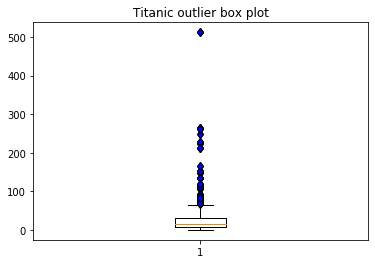

In [74]:
green_diamond = dict(markerfacecolor='b', marker='d')
plt.boxplot([ar['Fare']], flierprops=green_diamond)
plt.title("Titanic outlier box plot")
plt.show()


In [62]:
ar_out = ar

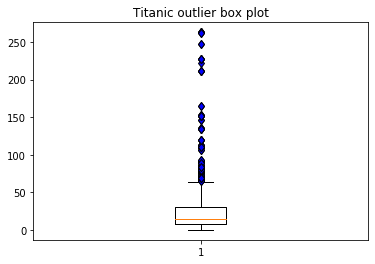

In [73]:
green_diamond = dict(markerfacecolor='b', marker='d')
plt.boxplot([ar_out['Fare']], flierprops=green_diamond)
plt.title("Titanic outlier box plot")
plt.show()

In [24]:
ar_out.loc[ar.Fare > 300] 

,Pclass,Age,Fare,Sex,Parch,SibSp,Cabin,Ticket,Embarked,Survived
258,1,35,512.3292,female,0,0,,PC 17755,C,1
679,1,36,512.3292,male,1,0,B51 B53 B55,PC 17755,C,1
737,1,35,512.3292,male,0,0,B101,PC 17755,C,1


In [64]:
import copy

In [ ]:
ar_out = ar


In [65]:
ar_out = copy.deepcopy(ar)

In [69]:
ar_out

,Pclass,Age,Fare,Sex,Parch,SibSp,Cabin,Ticket,Embarked,Survived
0,3,22.0,7.2500,male,0,1,NaN,A/5 21171,S,0
1,1,38.0,71.2833,female,0,1,C85,PC 17599,C,1
2,3,26.0,7.9250,female,0,0,NaN,STON/O2. 3101282,S,1
3,1,35.0,53.1000,female,0,1,C123,113803,S,1
4,3,35.0,8.0500,male,0,0,NaN,373450,S,0
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,13.0000,male,0,0,NaN,211536,S,0
887,1,19.0,30.0000,female,0,0,B42,112053,S,1
888,3,NaN,23.4500,female,2,1,NaN,W./C. 6607,S,0
889,1,26.0,30.0000,male,0,0,C148,111369,C,1


Fare outlier -> replace their values with max value except for these outliers. 

In [49]:
type()
ar_out2 = ar_out

In [72]:
#300 이하 중 최댓값 구하기 

#값이 지워지는 문장 

for i in range (0,len(ar_out)):
    if ar_out.Fare[i] > 300:
        ar_out.Fare[i] = 0

In [52]:
max(ar_out.Fare)
max(ar_out2.Fare)

263.0

In [53]:
ar_out = ar

In [56]:
max(sdf.Fare)

263.0

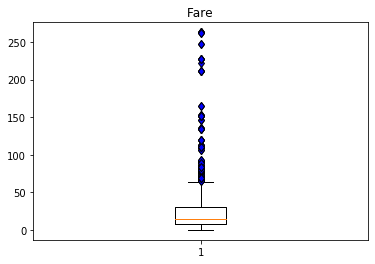

In [30]:
green_diamond = dict(markerfacecolor='b', marker='d')
plt.boxplot([ar['Fare']], flierprops=green_diamond)
plt.title("Fare")
plt.show()

### Plotting

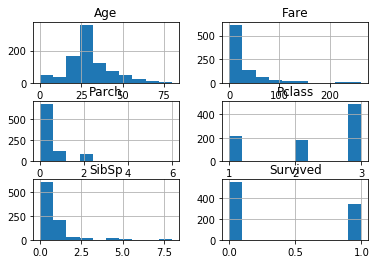

In [31]:
ar.hist()
plt.show()

I could see only numeric data is shown on histograms.

### Scatter plot
Now, I will see scatter plot but since the dependent variable in this case is Survival value and it is binary as either 0 or 1, it doesn't seem to be linear when shown on scatter plot with other independent variables. So, I will first see the relation between Survival and other features, then also see the relation between features of numeric with the range. 
Let's see how linear the relation between each feature.


#### Survival & Age

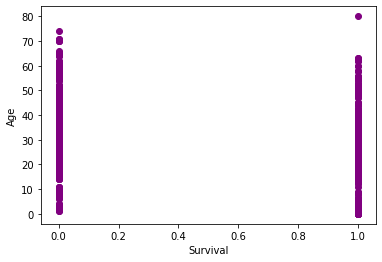

In [393]:
plt.scatter(ar.Survived, ar.Age, color="purple")
plt.xlabel("Survival")
plt.ylabel("Age")
plt.show()

I can see there is no survived around aged 65-80. Also, there is outlier among survived value, who is aged over 80.

#### Class & Survival

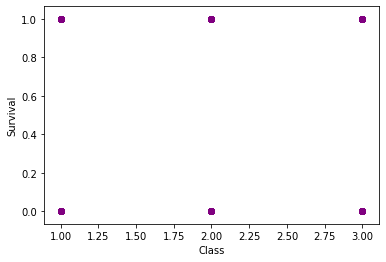

In [398]:
plt.scatter(ar.Pclass, ar.Survived, color ="purple")
plt.xlabel("Class")
plt.ylabel("Survival")
plt.show()

It seems like it will be better to split data to see the relation between Survival value and other variables for each class.  

#### Survival & Fare

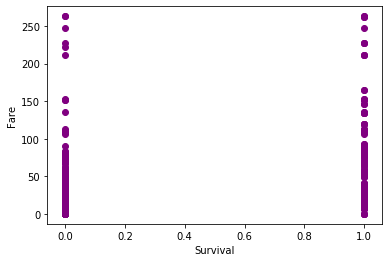

In [397]:
plt.scatter(ar.Survived, ar.Fare, color ="purple")
plt.xlabel("Survival")
plt.ylabel("Fare")
plt.show()

##### there is a outlier.

#### Survival & # of Parent-child 

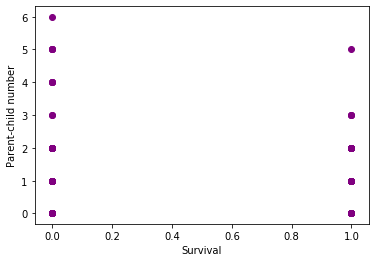

In [399]:
plt.scatter(ar.Survived, ar.Parch, color ="purple")
plt.xlabel("Survival")
plt.ylabel("Parent-child number")
plt.show()

#### Survival & # of Siblings

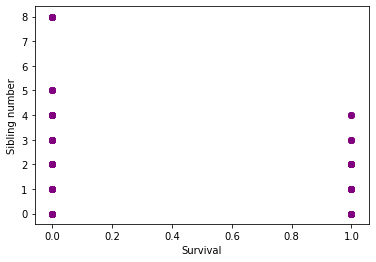

In [400]:
plt.scatter(ar.Survived, ar.SibSp, color ="purple")
plt.xlabel("Survival")
plt.ylabel("Sibling number")
plt.show()

### Below are plots for relation between each features except for Survival.

#### Class & Age

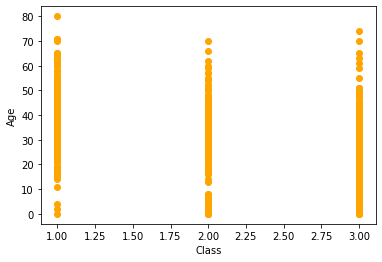

In [401]:
plt.scatter(ar.Pclass, ar.Age, color ="orange")
plt.xlabel("Class")
plt.ylabel("Age")
plt.show()

##### It will be interesting to see the relation between each class and age. 

#### Parent-Child & age 

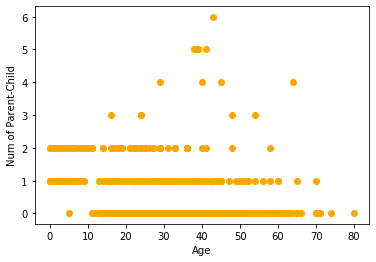

In [402]:
plt.scatter(ar.Age, ar.Parch, color="orange")
plt.xlabel("Age")
plt.ylabel("Num of Parent-Child")
plt.show()


1. Those who has none parent or child(Parch) is those who aboard alone.
2. Those who has 1 Parch is those who has only one parent or child aboard. Therefore, the number of passengers with one parent or child should be the half of the number of passenger who has '1' as their Parch value. (We haven't counted this number but we can do it later.) 
3. In a same way, in order to know the number of those who has 2 Parent-or-Child aboard, we need to devide the number of passengers with 2 as their Parch value by 3. 


#### Fare & Age

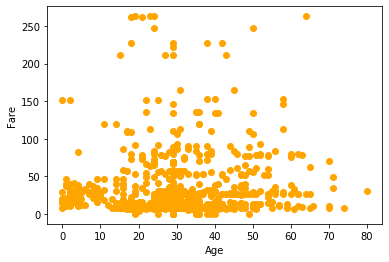

In [405]:
plt.scatter(ar.Age,ar.Fare,color="orange")
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


##### There is a few outliers around 500 in Fare values, so it should be removed and checked again.  

Most of passengers seems to have had ticket fare under 100.  
Also, there are not many passengers who had over-100 fares among over 60 or under 20.

#### Class & Fare

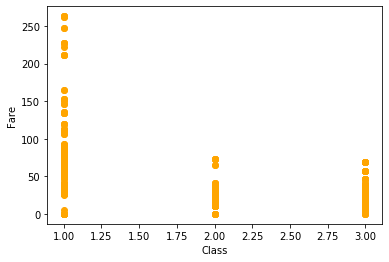

In [407]:
plt.scatter(ar.Pclass, ar.Fare, color="orange")
plt.xlabel("Class")
plt.ylabel("Fare")
plt.show()

This scatter plot makes sense in that first class shows higher relation with expensive Fare values, but when seeing only second and third fare, it doesn't seem a lot of difference in this plot. It can be because of the outliers of '500' in Fare.

This seems most linear among relation between variables in this dataset. 

###### Remove outlier and check the plot again. 
###### For some reason, there is error for Embarked and Cabin. I assume it's due to nan data. So, it would need pre-processing.

### Modeling

In [115]:
#split test / train data 

#msk = np.random.rand(len(titanic)) < 0.8
#train = sdf[msk]
#test = sdf[~msk]

#this dataset doesn't need to be splited since it is already splited as separate csv file. 

In [408]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

x = np.asanyarray(ar[['Pclass']])
y = np.asanyarray(ar[['Fare']])

#there will be error if there is any nan value in variables.

In [409]:
regr.fit (x,y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-29.4274519]]
Intercept:  [98.41664452]


Text(0, 0.5, 'Fare')

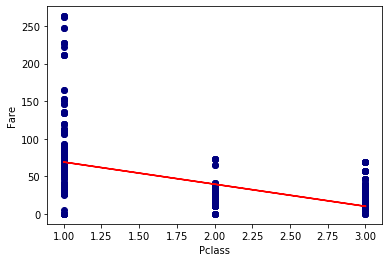

In [412]:
plt.scatter(ar.Pclass, ar.Fare,  color='navy')
plt.plot(x, regr.coef_[0][0]*x+ regr.intercept_[0], '-r')
plt.xlabel("Pclass")
plt.ylabel("Fare")

### Evaluation with Test file

In [413]:
test = pd.read_csv("C:/Users/admin/Desktop/data analysis/machine learning/titanic/test.csv")

In [414]:
test.info()
test.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [418]:
test['Fare'].fillna(test.Fare.mean())

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

In [416]:
test['Pclass'] = test['Pclass'].fillna(test.Age.mode())

In [419]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [262]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Pclass']])
test_y = np.asanyarray(test[['Fare']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 30.18
Residual sum of squares (MSE): 2177.98
R2-score: -0.41


R2-score maximum is 1.0 and higher score means better accuracy. 
Thus, this model accuracy is pretty bad with negative score.
##### Question: How is this evaluation related with train data? Is this result only related with test data as itself?


In [117]:
import seaborn as seabornInstance 


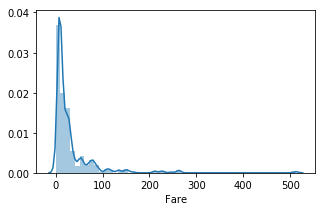

In [126]:
plt.figure(figsize=(5,3))
plt.tight_layout()
seabornInstance.distplot(titanic['Fare'])